In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB

# 1. Análise exploratória de dados: Faça uma análise exploratória dos dados para entender a distribuição das variáveis e identificar possíveis correlações entre elas

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
# Exibir as primeiras linhas do conjunto de dados
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df_sample_submission.columns

Index(['Id', 'SalePrice'], dtype='object')

In [14]:
# Verificar a existência de valores nulos
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [16]:
df_sample_submission.isnull().sum()

Id           0
SalePrice    0
dtype: int64

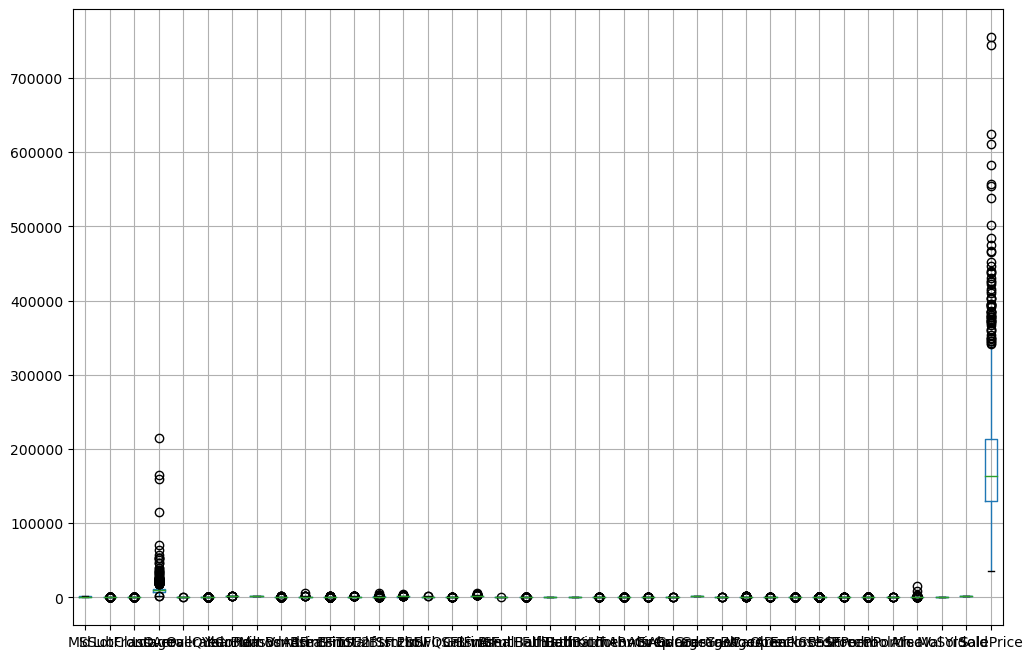

In [17]:
# Verificar a existência de outliers
df_train.boxplot(figsize=(12, 8))
plt.show()

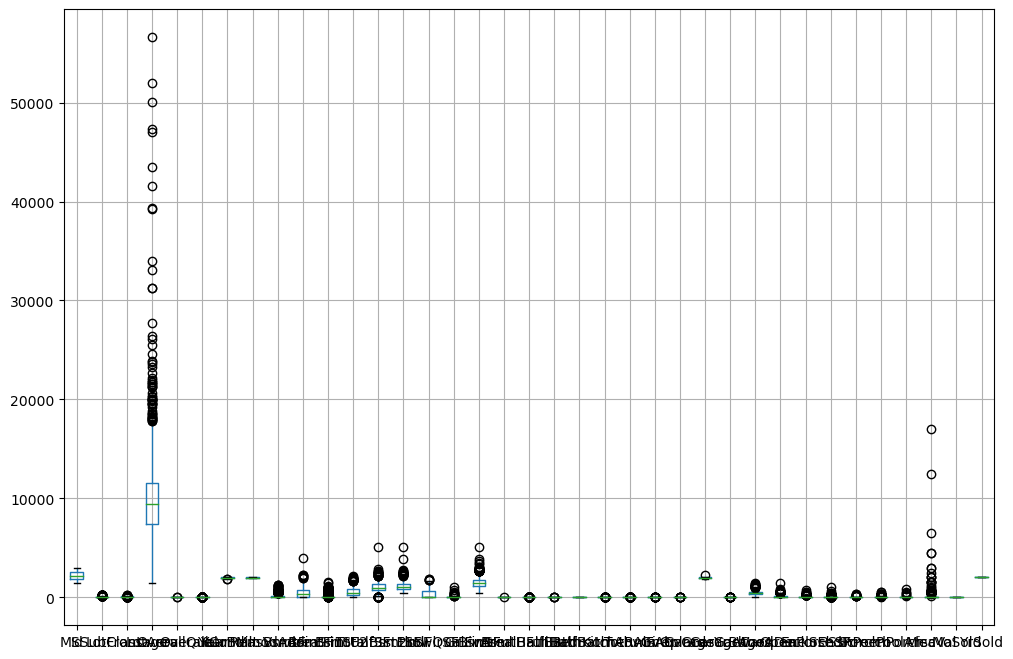

In [18]:
df_test.boxplot(figsize=(12, 8))
plt.show()

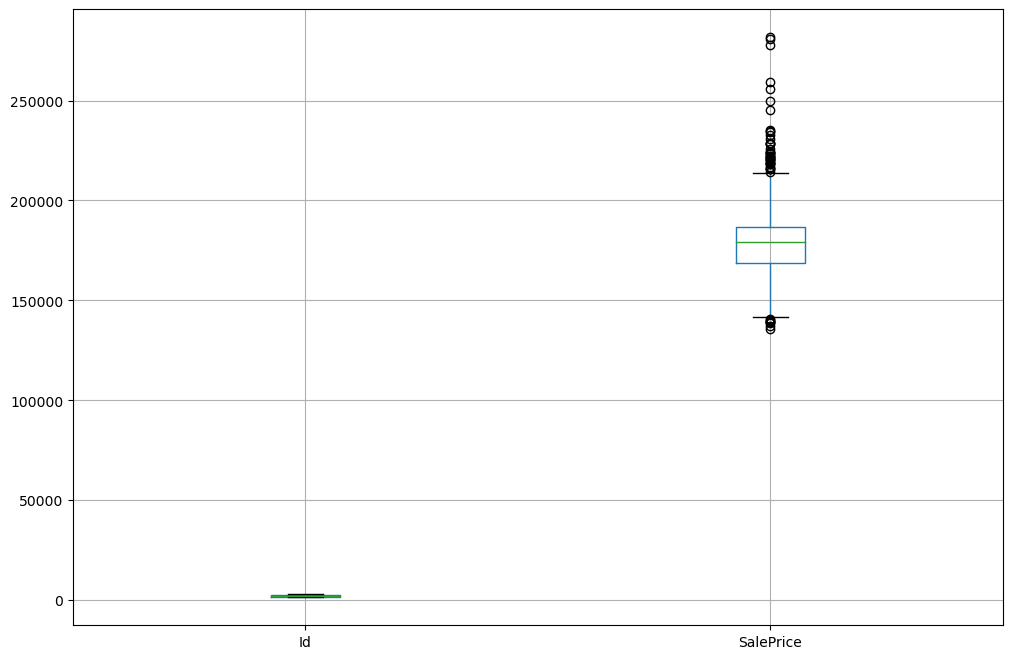

In [19]:
df_sample_submission.boxplot(figsize=(12, 8))
plt.show()

# 2. Featuring Engineering: Realize a engenharia de características para selecionar as variáveis mais importantes para o modelo de regressão.


In [20]:
# Remover colunas com alta porcentagem de valores ausentes
threshold = 0.7  # Porcentagem de valores ausentes acima da qual a coluna será removida
df_train = df_train.dropna(thresh=len(df_train) * threshold, axis=1)
df_test = df_test.dropna(thresh=len(df_test) * threshold, axis=1)

In [21]:
# Preencher valores ausentes com a média (numéricas) ou moda (categóricas)
numeric_columns = df_train.select_dtypes(include=np.number).columns
categorical_columns = df_train.select_dtypes(include='object').columns

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
# Remover a coluna "SalePrice" da lista de colunas numéricas
numeric_columns = numeric_columns.drop(["SalePrice", "Id"])

In [24]:
imputer = SimpleImputer(strategy='mean')  # Preenchimento com média para colunas numéricas
df_train[numeric_columns] = imputer.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = imputer.transform(df_test[numeric_columns])

In [25]:
imputer = SimpleImputer(strategy='most_frequent')  # Preenchimento com moda para colunas categóricas
df_train[categorical_columns] = imputer.fit_transform(df_train[categorical_columns])
df_test[categorical_columns] = imputer.transform(df_test[categorical_columns])

# 3. Aprendizagem supervisionada: O aluno deverá escolher um dos modelos de aprendizagem supervisionada (Regressão Linear, Naive Bayes, Regressão Logística, KNN, Árvore de Decisão, Random Forest ou XGBoost), realizar o treinamento do modelo com o dataset e avaliar seu desempenho com métricas adequadas.


a. Regressão Linear: Crie um modelo de regressão linear simples ou múltipla para prever o preço
de venda de uma casa.

In [26]:
# Combine os DataFrames de treinamento e teste
df_combined = pd.concat([df_train, df_test], axis=0)

# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Itere sobre as colunas do DataFrame combinado
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        # Aplique a codificação apenas nas colunas de tipo 'object'
        df_combined[col] = label_encoder.fit_transform(df_combined[col])

# Separe novamente os DataFrames de treinamento e teste
df_train_encoded = df_combined[:len(df_train)]
df_test_encoded = df_combined[len(df_train):]

df_train_encoded_2 = df_train_encoded

# Agora as variáveis categóricas foram codificadas corretamente em ambos os DataFrames

# Exemplo de uso:
X_train = df_train_encoded.drop(['Id', 'SalePrice'], axis=1)
y_train = df_train_encoded['SalePrice']
X_test = df_test_encoded.drop('Id', axis=1)

In [27]:
# Separar os dados de treinamento e teste
X = df_train_encoded.drop(['Id', 'SalePrice'], axis=1)
y = df_train_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = lr.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro médio absoluto (MAE): {:.2f}".format(mae))
print("Erro médio quadrático (MSE): {:.2f}".format(mse))
print("Coeficiente de determinação (R²): {:.2f}".format(r2))


Erro médio absoluto (MAE): 21632.35
Erro médio quadrático (MSE): 1175725893.06
Coeficiente de determinação (R²): 0.85


b. Classificação: Converta a variável de saída em uma variável binária e crie um modelo de
classificação para prever se uma casa será vendida por um preço alto ou baixo.

In [28]:
# Converter a variável de saída em uma variável binária
cutoff = df_train_encoded['SalePrice'].median()
df_train_encoded.loc[:, 'PriceCategory'] = (df_train_encoded['SalePrice'] > cutoff).astype(int)

# Selecionar todas as colunas, exceto 'Id', 'SalePrice' e 'PriceCategory'
features = df_train_encoded.drop(['Id', 'SalePrice', 'PriceCategory'], axis=1)

# Converter variáveis categóricas em variáveis dummy
X = pd.get_dummies(features, drop_first=True)
y = df_train_encoded['PriceCategory']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de Regressão Logística
logreg = LogisticRegression(max_iter=1000)

# Treinar o modelo
logreg.fit(X_train, y_train)

# Fazer previsões
y_pred = logreg.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:")
print(confusion)

Accuracy: 0.9075342465753424
Confusion matrix:
[[144  17]
 [ 10 121]]


C:\Users\jadson.lr\AppData\Local\Temp\ipykernel_18080\3466075852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_encoded.loc[:, 'PriceCategory'] = (df_train_encoded['SalePrice'] > cutoff).astype(int)
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
columns_to_show = ['Id', 'SalePrice', 'PriceCategory']
data_to_show = df_train_encoded[columns_to_show]
print(data_to_show)

        Id  SalePrice  PriceCategory
0        1   208500.0              1
1        2   181500.0              1
2        3   223500.0              1
3        4   140000.0              0
4        5   250000.0              1
...    ...        ...            ...
1455  1456   175000.0              1
1456  1457   210000.0              1
1457  1458   266500.0              1
1458  1459   142125.0              0
1459  1460   147500.0              0

[1460 rows x 3 columns]


# 4. Aprendizagem não supervisionada: O aluno deverá escolher uma técnica de aprendizagem não supervisionada (Clusterização, Redução de Dimensionalidade, Análise de Associação, Análise de Outlier ou Visualização de Dados), aplicá-la ao dataset e interpretar seus resultados.

 a. Clusterização: Use um algoritmo de clusterização para identificar grupos de casas com
características semelhantes.

In [30]:
# Selecionar as características relevantes para a clusterização
features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle']

# Criar um novo DataFrame com apenas as características selecionadas
df_cluster = df_train_encoded[features].copy()

# Normalizar os dados
df_cluster = (df_cluster - df_cluster.mean()) / df_cluster.std()

# Definir o número de clusters desejado
k = 5

# Criar o modelo de clusterização
kmeans = KMeans(n_clusters=k, random_state=42)

# Treinar o modelo de clusterização
kmeans.fit(df_cluster)

# Obter os rótulos de cluster para cada amostra
labels = kmeans.labels_

# Adicionar os rótulos de cluster ao DataFrame original
df_train_encoded['ClusterLabel'] = labels

C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\jadson.lr\AppData\Local\Temp\ipykernel_18080\2954279900.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_encoded['ClusterLabel'] = labels


b. Redução de dimensionalidade: Use uma técnica de redução de dimensionalidade para
visualizar os dados em um espaço de menor dimensão.

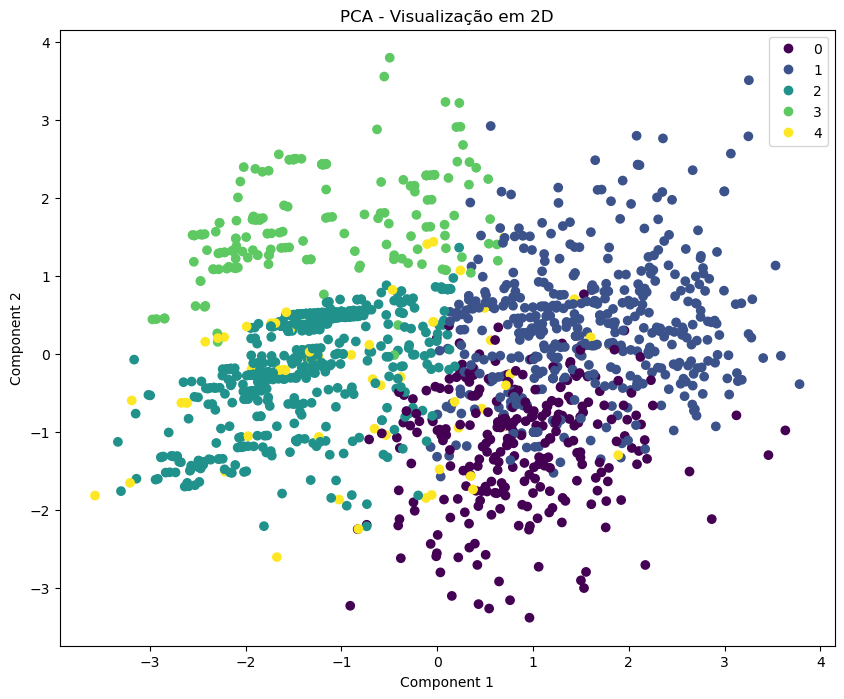

In [31]:
# Selecionar as características relevantes para a redução de dimensionalidade
features = features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle']

# Criar um novo DataFrame com apenas as características selecionadas
df_pca = df_train_encoded[features].copy()

# Normalizar os dados
df_pca = (df_pca - df_pca.mean()) / df_pca.std()

# Criar o objeto PCA
pca = PCA(n_components=2)

# Aplicar o PCA aos dados
principal_components = pca.fit_transform(df_pca)

# Criar um DataFrame com as componentes principais
df_components = pd.DataFrame(data=principal_components, columns=['Component 1', 'Component 2'])

# Adicionar a coluna de rótulos de cluster ao DataFrame de componentes
df_components['ClusterLabel'] = df_train_encoded['ClusterLabel']

# Plotar os dados reduzidos em um gráfico de dispersão
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_components['Component 1'], df_components['Component 2'], c=df_components['ClusterLabel'], cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - Visualização em 2D')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.show()


 c. Análise de associação: Use o algoritmo Apriori para identificar associações entre as
características das casas.

In [32]:
# Discretização da variável OverallQual em três faixas
df_train_discretized = df_train_encoded.copy()
df_train_discretized['OverallQual'] = pd.cut(df_train_encoded['OverallQual'], bins=3, labels=['Baixa', 'Média', 'Alta'])

# Converter valores categóricos para numéricos
mapeamento = {'Baixa': 1, 'Média': 2, 'Alta': 3}
df_train_discretized = df_train_discretized.apply(lambda x: x.map(mapeamento) if x.name == 'OverallQual' else x)

# Converter a lista de transações de volta para um DataFrame
df_transactions = pd.DataFrame(df_train_discretized)

# Preencher valores ausentes com a média dos valores da coluna
df_transactions = df_transactions.fillna(df_transactions.mean())

# Converter DataFrame para uma lista de transações
transactions = df_transactions.values.tolist()

# Aplicação do Apriori
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_transactions_encoded = pd.DataFrame(te_array, columns=te.columns_)
frequent_itemsets = apriori(df_transactions_encoded, min_support=0.1, use_colnames=True)

# Geração das regras de associação
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Formatação e exibição das regras de associação
pd.set_option('display.max_columns', None)  # Exibir todas as colunas do DataFrame
pd.set_option('display.expand_frame_repr', False)  # Não quebrar linhas na exibição
pd.set_option('display.float_format', '{:.2f}'.format)  # Formatar valores float com duas casas decimais

# Ordenar as regras por lift em ordem decrescente
rules = rules.sort_values(by='lift', ascending=False)

# Adicionar números de linha nas regras
rules['Rule'] = rules.index + 1

# Selecionar as colunas relevantes para exibição
columns_to_show = ['Rule', 'antecedents', 'consequents', 'support', 'confidence', 'lift']

# Exibir as regras de associação formatadas com limite de linhas
print("Regras de Associação:")
print(rules[columns_to_show].to_string(index=False, max_rows=20))

C:\Users\jadson.lr\AppData\Local\Temp\ipykernel_18080\4091271799.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_transactions = df_transactions.fillna(df_transactions.mean())


Regras de Associação:
  Rule                      antecedents                               consequents  support  confidence  lift
421406           (1.0, 4.0, 12.0, 60.0)           (0.0, 2.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.81
422344 (0.0, 1.0, 3.0, 4.0, 12.0, 60.0)                     (8.0, 13.0, 5.0, 6.0)     0.14        0.75  1.81
348674                (3.0, 12.0, 60.0)                (4.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.81
405992           (1.0, 3.0, 12.0, 60.0)                (4.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.81
422604                     (12.0, 60.0) (0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.81
405994           (1.0, 4.0, 12.0, 60.0)                (3.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.81
344423                (1.0, 12.0, 60.0)                (3.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.81
406003           (3.0, 4.0, 12.0, 60.0)                (1.0, 5.0, 6.0, 8.0, 13.0)     0.14        0.75  1.

d. Análise de outlier: Use o algoritmo Local Outlier Factor para identificar casas que podem ser
consideradas outliers.

Casas consideradas outliers:
  Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  PriceCategory  ClusterLabel
  29       20.00         3        47.00 16321.00     

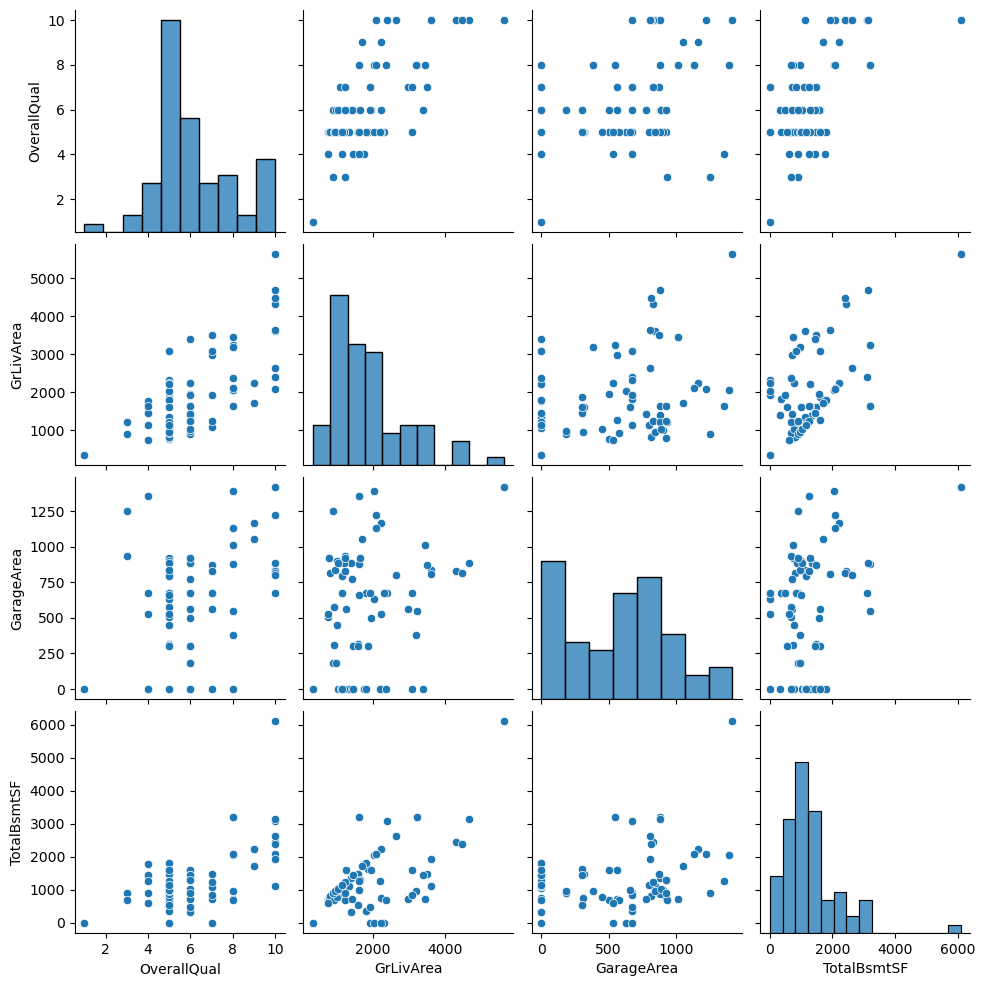

In [33]:
# Criar uma cópia do dataframe original
df_outliers = df_train_encoded.copy()

# Selecionar as colunas numéricas relevantes para a análise de outliers
numeric_columns = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
df_numeric = df_outliers[numeric_columns]

# Preencher os valores ausentes com a média da coluna
df_numeric = df_numeric.fillna(df_numeric.mean())

# Aplicar o algoritmo LOF para detectar os outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_scores = lof.fit_predict(df_numeric)

# Identificar os índices das linhas que foram consideradas outliers
outlier_indices = np.where(outlier_scores == -1)[0]

# Exibir as linhas consideradas outliers
outliers = df_outliers.iloc[outlier_indices]

# Contar o número de outliers em cada coluna
outlier_counts = outliers[numeric_columns].count()

# Imprimir o resultado de forma formatada
print("Casas consideradas outliers:")
print(outliers.to_string(index=False))

# Plotar gráficos de dispersão entre as colunas numéricas
sns.pairplot(outliers[numeric_columns])
plt.show()

## 5. Métricas de avaliação e comparação: Use diferentes métricas para avaliar o desempenho dos modelos criados e compará-los.


In [34]:
# Separar os dados em atributos (X) e variável alvo (y)
X = df_train_encoded.drop('SalePrice', axis=1)
y = df_train_encoded['SalePrice']

# Separar os dados em atributos (X) e variável alvo (y)
X = df_train_encoded.drop('SalePrice', axis=1)
y = df_train_encoded['SalePrice']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão linear
linear_model = LinearRegression()

# Treinar o modelo de regressão linear
linear_model.fit(X_train, y_train)

# Fazer previsões nos dados de teste com o modelo de regressão linear
linear_predictions = linear_model.predict(X_test)

# Calcular as métricas de avaliação para o modelo de regressão linear
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

# Inicializar o modelo Naive Bayes
nb_model = GaussianNB()

# Treinar o modelo Naive Bayes
nb_model.fit(X_train, y_train)

# Fazer previsões nos dados de teste com o modelo Naive Bayes
nb_predictions = nb_model.predict(X_test)

# Calcular as métricas de avaliação para o modelo Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Imprimir as métricas de avaliação para os dois modelos
print("Métricas de Avaliação:")
print("Regressão Linear:")
print("   MAE:", linear_mae)
print("   MSE:", linear_mse)
print("   RMSE:", linear_rmse)
print("   R²:", linear_r2)
print("Naive Bayes:")
print("   Acurácia:", nb_accuracy)


Métricas de Avaliação:
Regressão Linear:
   MAE: 21430.703739383072
   MSE: 1188100847.9225624
   RMSE: 34468.83879567982
   R²: 0.8451042607797687
Naive Bayes:
   Acurácia: 0.010273972602739725


In [35]:
# Separa o DataFrame em conjunto de treinamento e teste
X = df_train_encoded_2.drop('SalePrice', axis=1)
y = df_train_encoded_2['SalePrice']

# Separando em conjunto de treino e validação
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando em conjunto de teste e validação
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Criando os modelos
nb = MultinomialNB()
lr = LogisticRegression(max_iter=10000, random_state=1032)
# Criar o modelo de Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)

# Aplicar validação cruzada 5-fold para o modelo de Árvore de Decisão
scores_dt = cross_val_score(dt, X_train, y_train, cv=3)

# Aplicando validação cruzada 5-fold para o modelo Multinomial Naive Bayes
scores_nb = cross_val_score(nb, X_train, y_train, cv=3)

# Aplicando validação cruzada 5-fold para o modelo Logistic Regression
scores_lr = cross_val_score(lr, X_train, y_train, cv=3)

# Imprimindo os resultados
print("Validação Cruzada 3-fold para Multinomial Naive Bayes: ")
print("Acurácia média: {:.2f}".format(scores_nb.mean()))
print("Desvio padrão: {:.2f}".format(scores_nb.std()))
print("\n")
print("Validação Cruzada 3-fold para Logistic Regression: ")
print("Acurácia média: {:.2f}".format(scores_lr.mean()))
print("Desvio padrão: {:.2f}".format(scores_lr.std()))
print("\n")
print("Validação Cruzada 3-fold para Árvore de Decisão:")
print("Acurácia média: {:.2f}".format(scores_dt.mean()))
print("Desvio padrão: {:.2f}".format(scores_dt.std()))


C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

Validação Cruzada 3-fold para Multinomial Naive Bayes: 
Acurácia média: 0.00
Desvio padrão: 0.00


Validação Cruzada 3-fold para Logistic Regression: 
Acurácia média: 0.01
Desvio padrão: 0.00


Validação Cruzada 3-fold para Árvore de Decisão:
Acurácia média: 0.01
Desvio padrão: 0.00


C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Treinando e ajustando os modelos com o conjunto de treino
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Fazendo as previsões nos conjuntos de teste e validação
y_pred_test_nb = nb.predict(X_test)
y_pred_test_lr = lr.predict(X_test)
y_pred_test_dt = dt.predict(X_test)
y_pred_val_nb = nb.predict(X_val)
y_pred_val_lr = lr.predict(X_val)
y_pred_val_dt = dt.predict(X_val)

# Imprimindo as métricas de classificação para os modelos no conjunto de teste
print("Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_nb))
print("\n")
print("Métricas de classificação para Logistic Regression no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_lr))
print("\n")
print("Métricas de classificação para Árvore de Decisão no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_dt))

C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: 
              precision    recall  f1-score   support

     35311.0       0.00      0.00      0.00       1.0
     40000.0       0.00      0.00      0.00       1.0
     58500.0       0.00      0.00      0.00       0.0
     60000.0       0.00      0.00      0.00       1.0
     66500.0       0.00      0.00      0.00       1.0
     67000.0       0.00      0.00      0.00       2.0
     73000.0       0.00      0.00      0.00       0.0
     75000.0       0.00      0.00      0.00       1.0
     76000.0       0.00      0.00      0.00       0.0
     79900.0       0.00      0.00      0.00       0.0
     81000.0       0.00      0.00      0.00       1.0
     82000.0       0.00      0.00      0.00       0.0
     82500.0       0.00      0.00      0.00       0.0
     84000.0       0.00      0.00      0.00       0.0
     84500.0       0.00      0.00      0.00       1.0
     85000.0       0.00      0.00      0.00       1.0
   

C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


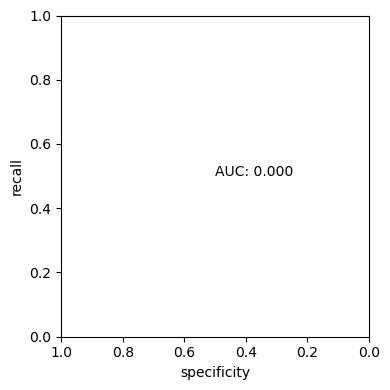

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


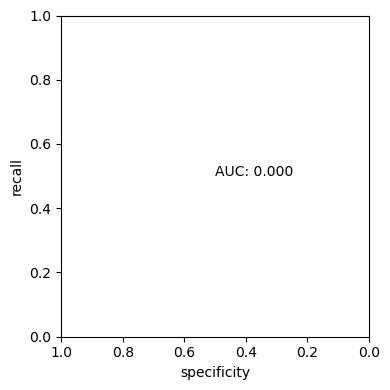

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

C:\Users\jadson.lr\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


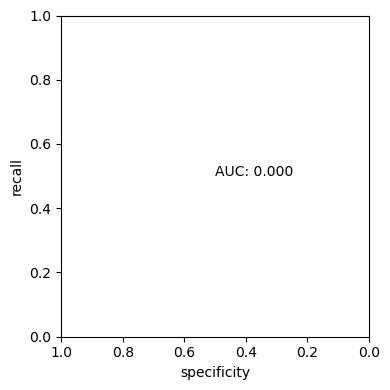

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()